In [192]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [193]:
house= pd.read_csv('preprocessing_final.csv')

In [194]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.229589,0,0


In [195]:
X= house.drop('price', axis=1)
Y=house['price']

In [196]:
# convert to numpy arrays
X=X.values
Y=Y.values

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [199]:
# convert x features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [200]:
# convert Y label to tensors long
y_train=torch.FloatTensor(y_train).reshape(-1,1)
y_test=torch.FloatTensor(y_test).reshape(-1,1)

In [201]:
# create a Model Class that inherit nn.Module
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model,self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

model = Model(X_train.shape[1])

In [202]:
model.parameters

<bound method Module.parameters of Model(
  (fc): Sequential(
    (0): Linear(in_features=12, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)>

In [203]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')



Epoch 10/100, Loss: 0.0132
Epoch 20/100, Loss: 0.0106
Epoch 30/100, Loss: 0.0085
Epoch 40/100, Loss: 0.0073
Epoch 50/100, Loss: 0.0066
Epoch 60/100, Loss: 0.0062
Epoch 70/100, Loss: 0.0058
Epoch 80/100, Loss: 0.0055
Epoch 90/100, Loss: 0.0052
Epoch 100/100, Loss: 0.0049


In [204]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test)
    print(f'Test MSE: {mse.item():.4f}')

Test MSE: 0.0119


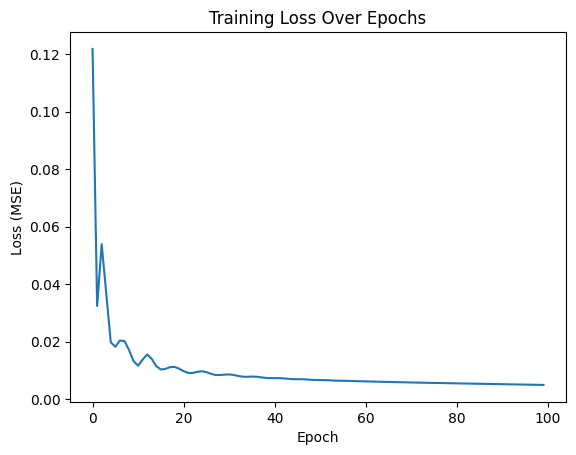

In [205]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()